# descriptive.ipynb

This notebook calculated descriptive statistics in detail. The main notebook reports just a summary.

The `display_summary_table` and `plot_descriptive` functions below are called from the main notebook.

<br>
<br>

In [22]:
from IPython.display import display,Markdown
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.ticker as mtick


def display_title(s, pref='Figure', num=1, center=False):
    ctag = 'center' if center else 'p'
    s    = f'<{ctag}><span style="font-size: 1.2em;"><b>{pref} {num}</b>: {s}</span></{ctag}>'
    if pref=='Figure':
        s = f'{s}<br><br>'
    else:
        s = f'<br><br>{s}'
    display( Markdown(s) )



Below the previously developed `parse_data.ipynb` notebook is run. See that notebook for details.

In [23]:
%run parse_data.ipynb
df_num = df.select_dtypes(include='number')
df_num.head()

df_num.describe()


,Profit,Sales,Quantity,Discount
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,28.656896,229.858001,3.789574,0.156203
std,234.260108,623.245101,2.225110,0.206452
min,-6599.978000,0.444000,1.000000,0.000000
25%,1.728750,17.280000,2.000000,0.000000
50%,8.666500,54.490000,3.000000,0.200000
75%,29.364000,209.940000,5.000000,0.200000
max,8399.976000,22638.480000,14.000000,0.800000


To create a custom display of descriptive statistics, let's first define functions that will calculate central tendency and dispersion metrics.

Refer also to [this notebook](https://github.com/0todd0000/OpenBook-DataAnalysisPracticeInPythonAndJupyter/blob/master/Lessons/Lesson04/5-Examples/DescriptiveStatsExamples.ipynb) for details regarding how create custom descriptive statistics tables.

In [24]:
def central(x):
    x0     = np.mean( x )
    x1     = np.median( x )
    x2     = stats.mode( x ).mode
    return x0, x1, x2


def dispersion(x):
    y0 = np.std( x )
    y1 = np.min( x )
    y2 = np.max( x )
    y3 = y2 - y1
    y4 = np.percentile( x, 25 )
    y5 = np.percentile( x, 75 )
    y6 = y5 - y4
    return y0,y1,y2,y3,y4,y5,y6

<br>

Let's now assemble and display a central tendency and dispersion table:

</br>

In [25]:
def display_descriptive_summary_table(num=1):
    display_title(
        'Descriptive summary statistics (central tendency and dispersion).',
        pref='Table',
        num=num,
        center=False
    )

    df_central = df_num.apply(lambda x: central(x), axis=0)
    df_central.index = ('mean', 'median', 'mode')

    df_dispersion = df_num.apply(lambda x: dispersion(x), axis=0)
    df_dispersion.index = ('st.dev.', 'min', 'max', 'range', '25th', '75th', 'IQR')

    df_summary = pd.concat([df_central, df_dispersion], axis=0)

    round_dict = {
        'Profit': 3,
        'Sales': 3,
        'Quantity': 3,
        'Discount': 3
    }

    df_summary = df_summary.round(round_dict)

    display(df_summary)

display_descriptive_summary_table()

<br><br><p><span style="font-size: 1.2em;"><b>Table 1</b>: Descriptive summary statistics (central tendency and dispersion).</span></p>

,Profit,Sales,Quantity,Discount
mean,28.657,229.858,3.790,0.156
median,8.666,54.490,3.000,0.200
mode,0.000,12.960,3.000,0.000
st.dev.,234.248,623.214,2.225,0.206
min,-6599.978,0.444,1.000,0.000
max,8399.976,22638.480,14.000,0.800
range,14999.954,22638.036,13.000,0.800
25th,1.729,17.280,2.000,0.000
75th,29.364,209.940,5.000,0.200
IQR,27.635,192.660,3.000,0.200


Let's save the variables in easier-to-use variable names:

In [26]:
y = df_num['Profit']
sales = df_num['Sales']
quantity = df_num['Quantity']
discount = df_num['Discount']


Let's create scatterplots for the DV (Profit) vs. each of the three IVs (Sales, Quantity, Discount):

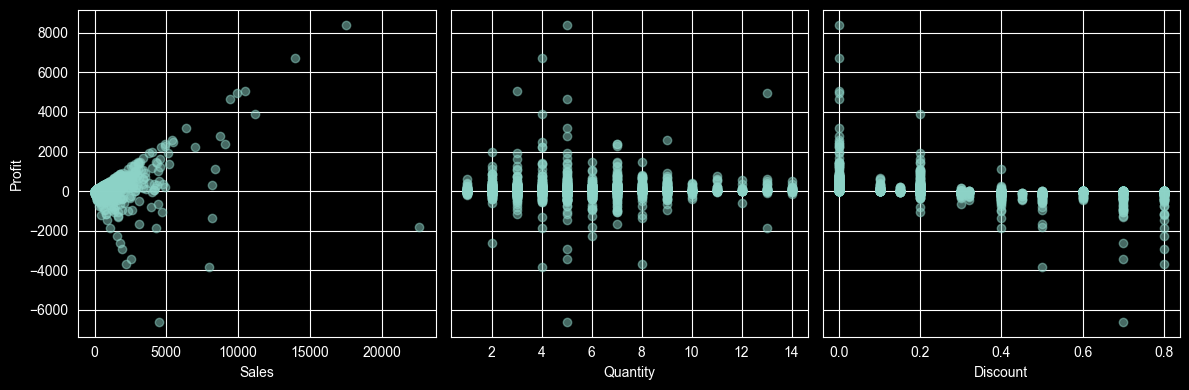

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)
axs[0].scatter(sales, y, alpha=0.5)
axs[1].scatter(quantity, y, alpha=0.5)
axs[2].scatter(discount, y, alpha=0.5)

xlabels = ('Sales', 'Quantity', 'Discount')
[ax.set_xlabel(s) for ax, s in zip(axs, xlabels)]
axs[0].set_ylabel('Profit')
[ax.set_yticklabels([]) for ax in axs[1:]]
plt.show()


The axis tick values for the selected variables can be adjusted to improve readability:

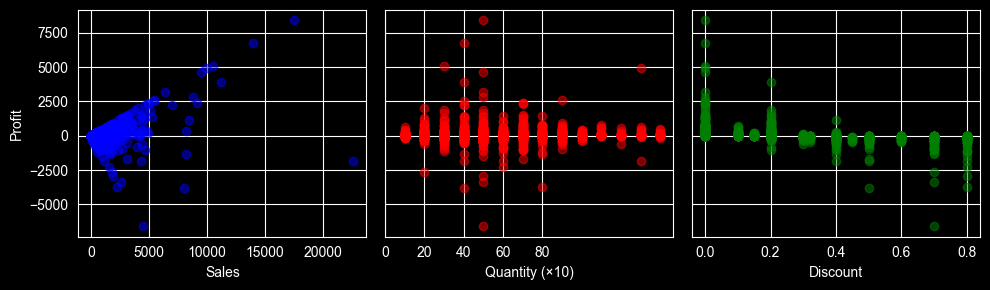

In [28]:
qty1 = np.around(10 * quantity, 1) 

fig, axs = plt.subplots(1, 3, figsize=(10, 3), tight_layout=True)
axs[0].scatter(sales, y, alpha=0.5, color='b')
axs[1].scatter(qty1, y, alpha=0.5, color='r')
axs[2].scatter(discount, y, alpha=0.5, color='g')

xlabels = ('Sales', 'Quantity (×10)', 'Discount')
[ax.set_xlabel(s) for ax, s in zip(axs, xlabels)]
axs[1].set_xticks([0, 20, 40, 60, 80])   # аналогічно "990, 995, 1000…"
axs[0].set_ylabel('Profit')
[ax.set_yticklabels([]) for ax in axs[1:]]
plt.show()


Next let's add regression lines and correlation coefficients to each plot:

In [29]:
def corrcoeff(x, y):
    r = np.corrcoef(x, y)[0,1]
    return r

def plot_regression_line(ax, x, y, **kwargs):
    a,b   = np.polyfit(x, y, deg=1)
    x0,x1 = min(x), max(x)
    y0,y1 = a*x0 + b, a*x1 + b
    ax.plot([x0,x1], [y0,y1], **kwargs)


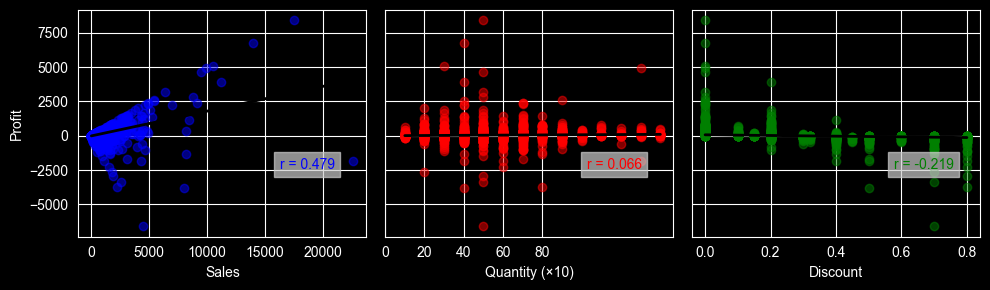

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), tight_layout=True)

ivs = [sales, qty1, discount]
colors = ('b', 'r', 'g')

for ax, x, c in zip(axs, ivs, colors):
    ax.scatter(x, y, alpha=0.5, color=c)
    plot_regression_line(ax, x, y, color='k', ls='-', lw=2)
    r = corrcoeff(x, y)
    ax.text(0.7, 0.3, f'r = {r:.3f}', color=c,
            transform=ax.transAxes,
            bbox=dict(color='0.8', alpha=0.7))

xlabels = ('Sales', 'Quantity (×10)', 'Discount')
[ax.set_xlabel(s) for ax, s in zip(axs, xlabels)]

axs[1].set_xticks([0, 20, 40, 60, 80])
axs[0].set_ylabel('Profit')
[ax.set_yticklabels([]) for ax in axs[1:]]

plt.show()


The correlation coefficients are all relatively low, suggesting no strong linear relationship between the DV (Profit) and the IVs.

However, in the Discount panel (right figure) it appears that the relationship may differ for low-profit (Profit ≤ 0) and high-profit (Profit > 0) orders.
To explore this further, let’s plot Profit vs. Discount separately for the low- and high-profit groups, including linear regression trend lines.

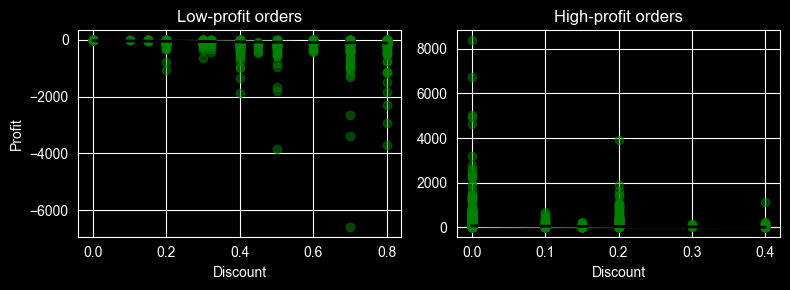

In [31]:
i_low  = y <= 0   
i_high = y > 0      

fig, axs = plt.subplots(1, 2, figsize=(8, 3), tight_layout=True)

for ax, mask in zip(axs, [i_low, i_high]):
    ax.scatter(discount[mask], y[mask], alpha=0.5, color='g')
    plot_regression_line(ax, discount[mask], y[mask], color='k', ls='-', lw=2)

[ax.set_xlabel('Discount') for ax in axs]

axs[0].set_title('Low-profit orders')
axs[0].set_ylabel('Profit')
axs[1].set_title('High-profit orders')

plt.show()


The linear trend lines in the figures above appear to be opposite to the visual patterns:

- Profit appears to decrease as Discount increases in low-profit orders  
- Profit appears to increase slightly with small Discounts in high-profit orders

Linear regression suggests that the average pattern is more complex.  
To see why, let's highlight the average Profit at each Discount level.


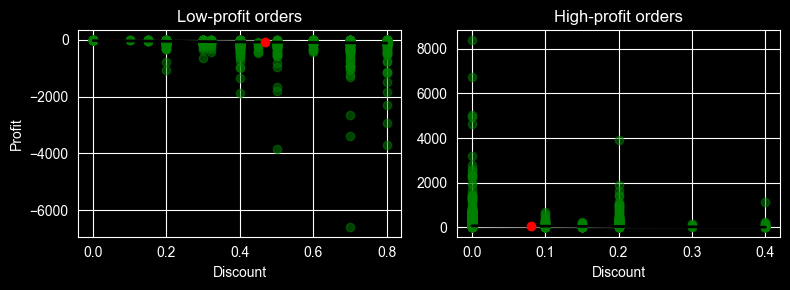

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(8,3), tight_layout=True)

for ax, i in zip(axs, [i_low, i_high]):
    ax.scatter(discount[i], y[i], alpha=0.5, color='g')
    plot_regression_line(ax, discount[i], y[i], color='k', ls='-', lw=2)

axs[0].plot(discount[i_low].mean(), y[i_low].mean(), 'ro')
axs[1].plot(discount[i_high].mean(), y[i_high].mean(), 'ro')

[ax.set_xlabel('Discount') for ax in axs]
axs[0].set_title('Low-profit orders')
axs[0].set_ylabel('Profit')
axs[1].set_title('High-profit orders')

plt.show()


These analyses show that the trends based only on the mean discount values are not sufficient to clearly explain profit behavior.
Profit varies strongly across orders, and the averages do not capture the complexity of the relationship between Discount and Profit, especially when comparing low-profit and high-profit groups.

Let's now assemble all results into a single figure for reporting purposes:

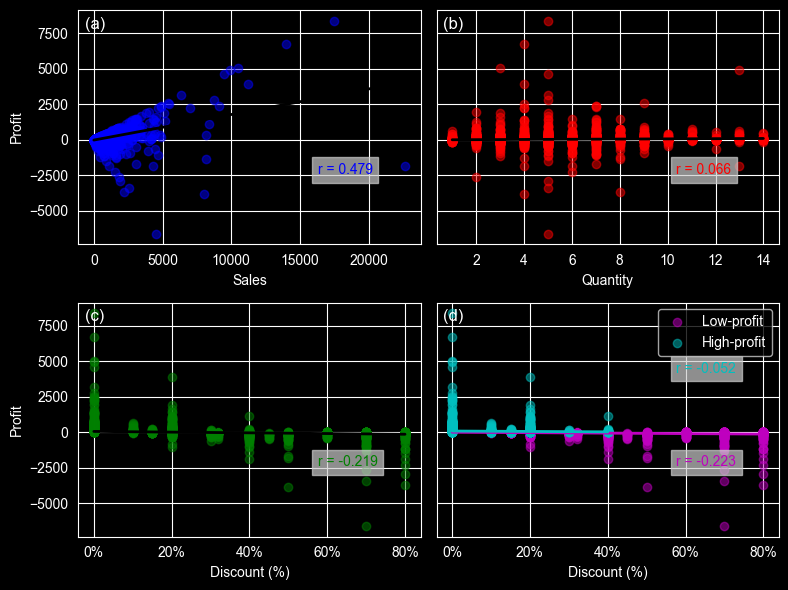

<br><br><p><span style="font-size: 1.2em;"><b>Fig. 1</b>: Correlations amongst main variables.</span></p>

In [33]:
def plot_descriptive():

    fig, axs = plt.subplots(2, 2, figsize=(8, 6), tight_layout=True)
    ivs      = [sales, quantity, discount]
    colors   = ('b', 'r', 'g')

    for ax, x, c in zip(axs.ravel(), ivs, colors):
        ax.scatter(x, y, alpha=0.5, color=c)
        plot_regression_line(ax, x, y, color='k', ls='-', lw=2)
        r = corrcoeff(x, y)
        ax.text(
            0.7, 0.3, f'r = {r:.3f}', color=c,
            transform=ax.transAxes,
            bbox=dict(color='0.8', alpha=0.7)
        )

    xlabels = ('Sales', 'Quantity', 'Discount (%)')
    for ax, lbl in zip(axs.ravel(), xlabels):
        ax.set_xlabel(lbl)

    for ax in axs[:, 0]:
        ax.set_ylabel('Profit')

    for ax in axs[:, 1]:
        ax.set_yticklabels([])

    axs[1, 0].xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
    axs[1, 1].xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

    ax = axs[1, 1]
    i_low  = y <= y.median()
    i_high = y > y.median()

    fcolors = ('m', 'c')
    labels  = ('Low-profit', 'High-profit')

    for mask, color, name in zip((i_low, i_high), fcolors, labels):
        ax.scatter(discount[mask], y[mask], alpha=0.5, color=color, label=name)
        plot_regression_line(ax, discount[mask], y[mask], color=color, ls='-', lw=2)
        r = corrcoeff(discount[mask], y[mask])
        ax.text(
            0.7, 0.7 if name == 'High-profit' else 0.3,
            f'r = {r:.3f}', color=color,
            transform=ax.transAxes,
            bbox=dict(color='0.8', alpha=0.7)
        )

    ax.set_xlabel('Discount (%)')
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
    ax.legend()

    panel_labels = ('a', 'b', 'c', 'd')
    for ax, lbl in zip(axs.ravel(), panel_labels):
        ax.text(0.02, 0.92, f'({lbl})', size=12, transform=ax.transAxes)

    plt.show()
    display_title('Correlations amongst main variables.', pref='Fig.', num=1)

plot_descriptive()